In [ ]:
# Load the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np


- loading the data<br>
  dropping the ID column<br>
  removing examples with missing values<br>
  selecting all features except "class" as X<br>
  selecting "class" as y <br>split into
  three parts: 60% train, 20% validation and 20% test<br><br>
  *remember to use stratification, and "random_state=YOUR_ID"*<br><br>

In [ ]:
# Load the data from the provided URL
url = "https://raw.githubusercontent.com/bpfa/data_for_compx310_2023/main/wisconsin_breast_cancer.csv"
df = pd.read_csv(url)

# Drop the 'ID' column
df.drop(columns=['id'], inplace=True)

# Remove examples with missing values
df.dropna(inplace=True)

#  Select all features except "class" as X
X = df.drop(columns=['class'])

# select "class" as y
y = df['class']

# Prepare to split into three parts: 60% train, 20% validation and 20% test
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Use "random_state=YOUR_ID"
MY_ID = 1481257
random_state = MY_ID

# Use stratification to maintain class distribution during the data split.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_ratio), stratify=y, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_ratio / (test_ratio + val_ratio)), stratify=y_temp, random_state=random_state)



- A) <br>
  Using the train data, build a LogisticRegression model
  for each subset of the features.<br>

  Collect the accuracy of each model on both the
  validation and the test set.<br>

  Produce a plot of validation accuracy (x-axis)
  versus the test accuracy (y-axis).<br>

  Describe what the plot shows you in a few sentences.<br>
   
  [1 mark]

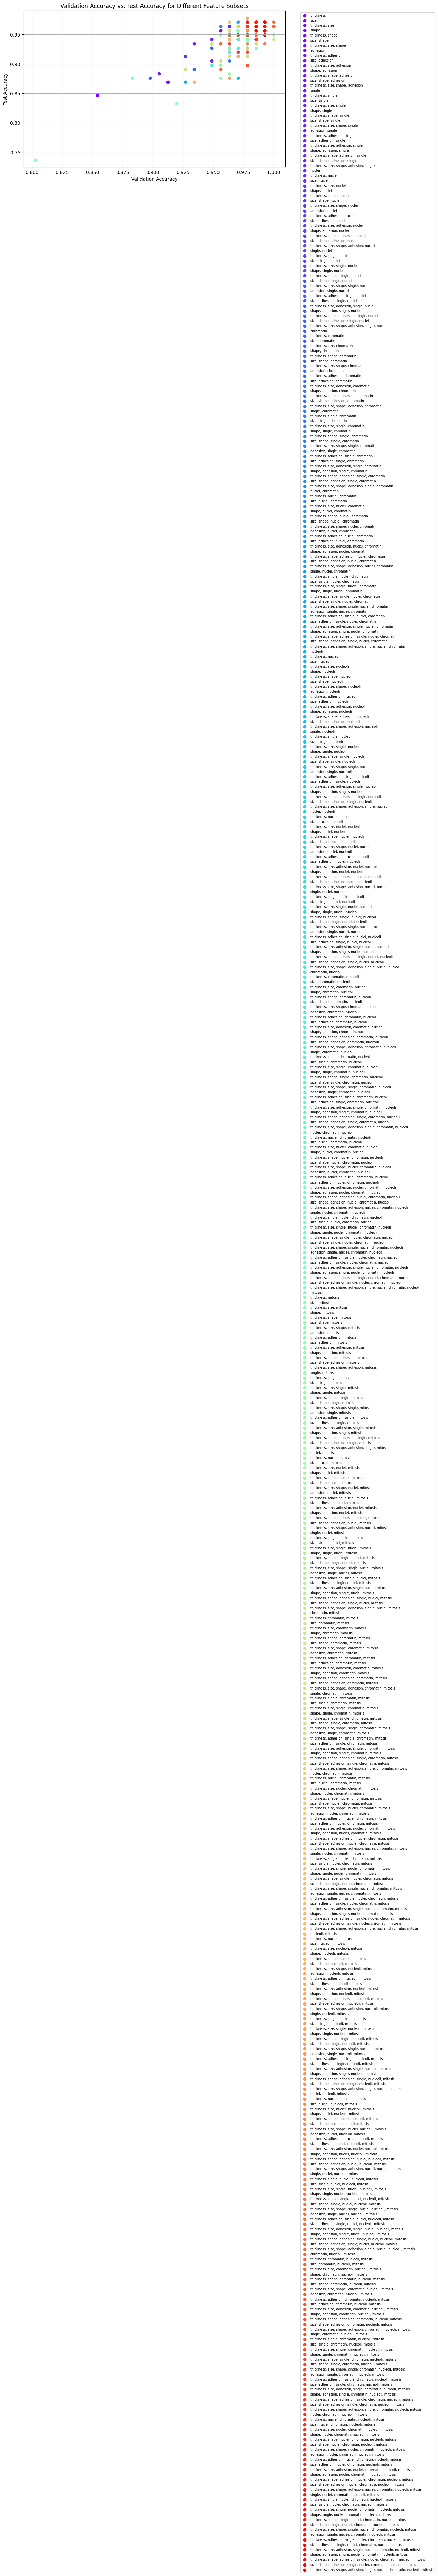

In [ ]:
# This function will be used to train and evaluate logistic regression models
def evaluate_logistic_regression(X_train, X_val, y_train, y_val, X_test, y_test):
    model = LogisticRegression(random_state=random_state)
    model.fit(X_train, y_train)
    val_accuracy = model.score(X_val, y_val)
    test_accuracy = model.score(X_test, y_test)
    return val_accuracy, test_accuracy

# Helper function to in function which generates subsets
def on_bits(k, n):
    return [j for j in range(n) if ((1 << j) & k) > 0]

# Function used to generate subsets
def nonempty_subsets(lst):
    n = len(lst)
    return [[lst[i] for i in on_bits(k, n)] for k in range(1, 1<<n)]

# Collect the accuracy of each model on both the validation and the test set.
subsets = nonempty_subsets(X.columns.tolist())
val_accuracies = []
test_accuracies = []

# Using the train data, build a LogisticRegression model for each subset of the features
for subset in subsets:
    X_train_subset = X_train[subset]
    X_val_subset = X_val[subset]
    X_test_subset = X_test[subset]
    val_acc, test_acc = evaluate_logistic_regression(X_train_subset, X_val_subset, y_train, y_val, X_test_subset, y_test)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

# Color mapping for subsets using the 'rainbow' colormap
subset_colors = plt.cm.rainbow(np.linspace(0, 1, len(subsets)))

# Plot validation accuracy vs. test accuracy for each subset
plt.figure(figsize=(10, 6))
for i, subset in enumerate(subsets):
    plt.scatter(val_accuracies[i], test_accuracies[i], marker='o', color=subset_colors[i], label=', '.join(subset))

# Produce a plot of validation accuracy (x-axis) versus the test accuracy (y-axis).
plt.xlabel('Validation Accuracy')
plt.ylabel('Test Accuracy')
plt.title('Validation Accuracy vs. Test Accuracy for Different Feature Subsets')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')
plt.grid(True)
plt.show()

<br>
**Describe what the plot shows you in a few sentences.**<br>

The plot illustrates a strong positive correlation between test accuracy and validation accuracy. As the validation accuracy increases, the test accuracy tends to follow the same trend, indicating that the model's performance on unseen data (test set) aligns well with its performance on the validation set. The relationship appears to be approximately linear, suggesting that improvements in the model's performance during validation also translate to improved performance on the test set. This consistency between validation and test accuracies indicates that the model is generalizing well and not overfitting to the validation data.

<br>


- B) <br>
  Train a LogisticRegression model on the full training set
  (ie. all features are included).<br>

  Report validation and test accuracy for this model.
  Look at the coefficients: which are the four features with
  the largest magnitude for their coefficient?<br>

  Now train a LogisticRegression model for this subset
  of features.<br>

  Again, report validation and test accuracy
  Looking only at the validation accuracies - which one
  looks better: the full model or the subset one?
  Is the model with the better validation accuracy
  also the one with the better test accuracy?<br>
  
  [1 mark]

In [ ]:
# Train a LogisticRegression model on the full training set (i.e., all features are included).
val_accuracy_all_features, test_accuracy_all_features = evaluate_logistic_regression(X_train, X_val, y_train, y_val, X_test, y_test)

# Report validation and test accuracy for this model.
model_full = LogisticRegression(random_state=random_state)
model_full.fit(X_train, y_train)
val_accuracy_full, test_accuracy_full = evaluate_logistic_regression(X_train, X_val, y_train, y_val, X_test, y_test)

# Look at the coefficients: which are the four features with the largest magnitude for their coefficient?
feature_importance = abs(model_full.coef_[0])
top_four_features = X_train.columns[feature_importance.argsort()[-4:][::-1]]
X_train_top_four = X_train[top_four_features]
X_val_top_four = X_val[top_four_features]
X_test_top_four = X_test[top_four_features]

# Now train a LogisticRegression model for this subset of features.
val_accuracy_top_four, test_accuracy_top_four = evaluate_logistic_regression(X_train_top_four, X_val_top_four, y_train, y_val, X_test_top_four, y_test)

# Again, report validation and test accuracy for this model using the subset of four features.
model_top_four = LogisticRegression(random_state=random_state)
model_top_four.fit(X_train_top_four, y_train)
val_accuracy_subset, test_accuracy_subset = evaluate_logistic_regression(X_train_top_four, X_val_top_four, y_train, y_val, X_test_top_four, y_test)

# Summarize the full training results in a table
results_fullTraining = pd.DataFrame({
    'method': ['all features', 'best subset from A', 'subset from B'],
    'val accuracy': [val_accuracy_all_features, max(val_accuracies), val_accuracy_subset],
    'test accuracy': [test_accuracy_all_features, max(test_accuracies), test_accuracy_subset]
})

# Summarize the subset results in a table
results_topFour = pd.DataFrame({
    'method': ['Top 4 features', 'best subset from A', 'subset from B'],
    'val accuracy': [val_accuracy_top_four, max(val_accuracies), val_accuracy_subset],
    'test accuracy': [test_accuracy_top_four, max(test_accuracies), test_accuracy_subset]
})

print(results_fullTraining)
print("-----------------------------------------------------------")
print(results_topFour)

               method  val accuracy  test accuracy
0        all features      0.992701       0.970803
1  best subset from A      1.000000       0.978102
2       subset from B      0.978102       0.956204
-----------------------------------------------------------
               method  val accuracy  test accuracy
0      Top 4 features      0.978102       0.956204
1  best subset from A      1.000000       0.978102
2       subset from B      0.978102       0.956204


<br> **which one looks better: the full model or the subset one? Is the model with the better validation accuracy also the one with the better test accuracy?**<br>

*please note that I've labelled the subset model as 'Top 4 features' under the method column in it's results table.*<br>

**Answer:**<br>

The full model is the one with both the higher validation accuracy as well as the higher test accuracy. <br>

More specifically, the full model has a slightly higher validation accuracy (0.992701) compared to the subset model's validation accuracy (0.978102). The subset model's test accuracy (0.956204) is also slightly lower than the full model's test accuracy (0.970803).<br>

Given this information, it is difficult to conclusively determine which model is better based solely on the validation and test accuracies. The differences between their accuracies are relatively small, and the subset model may have slightly lower test accuracy but could still be considered a good trade-off for simplicity and interpretability, especially if there are fewer features to consider.<br>

Ultimately, the choice between the full model and the subset model will depend on the specific requirements of the problem and considerations of model complexity. If interpretability and simplicity are essential, the subset model may be preferred. If maximizing predictive accuracy is the primary concern, the full model may be preferred. However, the differences in accuracy between the two models are not substantial, so it might be more appropriate to choose the model based on other factors, such as interpretability, feature importance, and domain knowledge.
<br><br><br><br><br>

- C) <br>
  Use PolynomialFeatures of degree=2 to maybe improve
  the LogisticRegression model. Make sure to set
  max_iter=10000 for this model.<br>
  Report validation and test accuracy for this model.<br>
  Now summarise all your results in one table with
  three columns and four rows.<br>

  If you select the method with the highest val accuracy,
  would that be a good choice with regard to test accuracy?<br>

  [1 mark]

In [ ]:
# Use PolynomialFeatures of degree=2 to maybe improve the LogisticRegression model.
poly = PolynomialFeatures(degree=2)

# Transform the training, validation, and test features into polynomial features
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Train and evaluate a LogisticRegression model using the polynomial features with max_iter=10000
model_poly = LogisticRegression(random_state=random_state, max_iter=10000)
model_poly.fit(X_train_poly, y_train)

# Obtain the validation and test accuracy for this model, to be reported in the results table.
val_accuracy_poly, test_accuracy_poly = evaluate_logistic_regression(X_train_poly, X_val_poly, y_train, y_val, X_test_poly, y_test)

# Now summarise the results in one table with three columns and four rows
results = pd.DataFrame({
    'method': ['all features', 'best subset from A', 'subset from B', 'PolynomialFeatures'],
    'val accuracy': [val_accuracy_all_features, max(val_accuracies), val_accuracy_top_four, val_accuracy_poly],
    'test accuracy': [test_accuracy_all_features, max(test_accuracies), test_accuracy_top_four, test_accuracy_poly]
})

print(results)



               method  val accuracy  test accuracy
0        all features      0.992701       0.970803
1  best subset from A      1.000000       0.978102
2       subset from B      0.978102       0.956204
3  PolynomialFeatures      0.970803       0.941606


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<br>**If you select the method with the highest val accuracy, would that be a good choice with regard to test accuracy?**<br>

If you select the method with the highest validation accuracy (best subset from A), you would choose the model with a validation accuracy of 1.000000 and a corresponding test accuracy of 0.978102, which is the highest of the reported test accuraccies. Considering this, this would seem to be a good choice with regard to test accuracy.